In [23]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("atharvasoundankar/global-housing-market-analysis-2015-2024")
path_1 = kagglehub.dataset_download("gpandi007/usa-housing-dataset")
print("Path to dataset files:", path)

import pandas as pd
# Load the dataset
global_data = pd.read_csv(path + "/global_housing_market_extended.csv")
us_data = pd.read_csv(path_1 + "/housing_train.csv")



Path to dataset files: /Users/dolphins/.cache/kagglehub/datasets/atharvasoundankar/global-housing-market-analysis-2015-2024/versions/1


In [2]:
!pip install kagglehub


Defaulting to user installation because normal site-packages is not writeable
  Using cached kagglehub-0.3.11-py3-none-any.whl.metadata (32 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
Using cached kagglehub-0.3.11-py3-none-any.whl (63 kB)
Using cached tqdm-4.67.1-py3-none-any.whl (78 kB)

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [24]:
"""Joining Mortgage Rate, Inflation Rate, GDP Growth, and Population Growth scraped from Bankrate & Fed Reserve"""
econ_data = pd.DataFrame({
    "YrSold": [2006, 2007, 2008, 2009, 2010],
    "Mortgage Rate (%)": [6.41, 6.34, 6.03, 5.04, 4.69],
    "Inflation Rate (%)": [3.2, 2.8, 3.8, -0.4, 1.6],
    "GDP Growth (%)": [2.7, 1.8, -0.1, -2.5, 2.6],
    "Population Growth (%)": [0.89, 0.95, 0.99, 0.86, 0.88]
})

# Merge into your dataset
us_data = us_data.merge(econ_data, on="YrSold", how="left")

In [27]:
# Build Random Forest Model

import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

# Drop identifier
df = us_data.drop(columns=["Id"])

# Define target
y = df["SalePrice"]

# Drop target from features
X = df.drop(columns=["SalePrice"])

# Label encode all object (categorical) columns
for col in X.select_dtypes(include="object").columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

X = X.fillna(0)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

# Manually calculate RMSE
mse = ((y_test - y_pred) ** 2).mean()
rmse = mse ** 0.5

print(f"Manual RMSE: {rmse:.2f}")

Manual RMSE: 28619.29


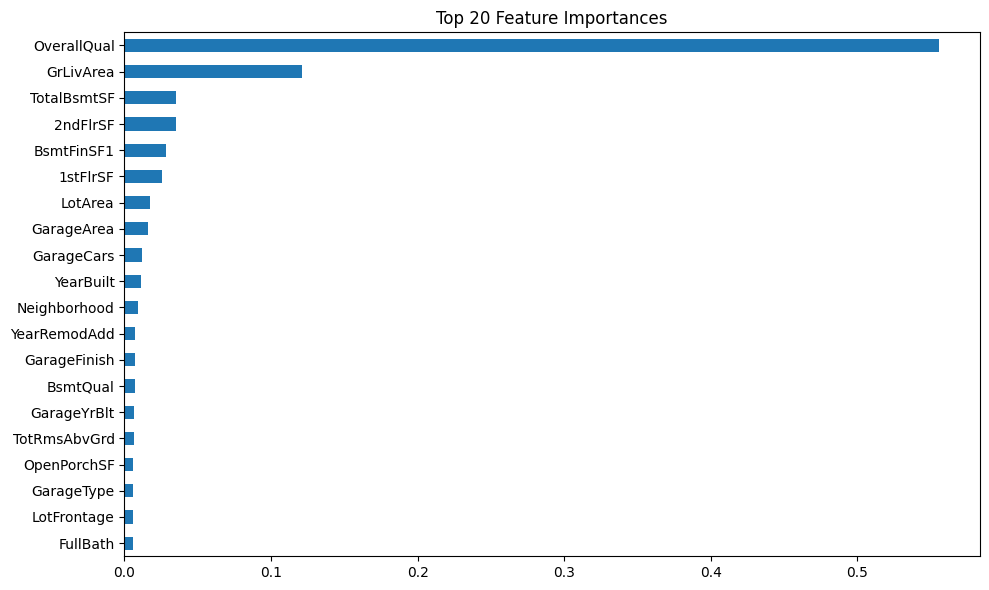

In [31]:
# Feature Importance Plots
import matplotlib.pyplot as plt

importances = pd.Series(rf.feature_importances_, index=X.columns)
importances.sort_values(ascending=False).head(20).plot(kind='barh', figsize=(10, 6))
plt.title("Top 20 Feature Importances")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [29]:
!pip install xgboost


Defaulting to user installation because normal site-packages is not writeable
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 15.0 MB/s eta 0:00:00

[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: /Library/Developer/CommandLineTools/usr/bin/python3 -m pip install --upgrade pip


In [30]:
import xgboost as xgb
from sklearn.model_selection import train_test_split

# Assume X and y are already prepped like before
X = df.drop(columns=["SalePrice"])
y = df["SalePrice"]

# Label encode categoricals (same as before)
from sklearn.preprocessing import LabelEncoder
for col in X.select_dtypes(include='object').columns:
    X[col] = LabelEncoder().fit_transform(X[col].astype(str))

# Handle missing values
X = X.fillna(0)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Build model
model_xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.1, max_depth=6, random_state=42)
model_xgb.fit(X_train, y_train)

# Predict and evaluate manually
y_pred = model_xgb.predict(X_test)
rmse = ((y_test - y_pred) ** 2).mean() ** 0.5
print(f"XGBoost RMSE: {rmse:.2f}")

XGBoost RMSE: 25429.53
